# Retail Data Analytics

You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments***. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales***

In [1]:
print(format('my name is mohamed sobhi and iam study in faculty in navigation sciece and space technology', '*^99'))    
print(format(' this challenge is to predict which departments will be affected and to what extent','*^99'))
print(format('Package: python ','*^65'))            
print(format('DataSet: Historical sales data from 45 stores', '*^65'))    
print(format('Model selection: Exploratory Data Analysis', '*^65'))  

****my name is mohamed sobhi and iam study in faculty in navigation sciece and space technology****
******** this challenge is to predict which departments will be affected and to what extent********
************************Package: python *************************
**********DataSet: Historical sales data from 45 stores**********
***********Model selection: Exploratory Data Analysis************


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
features_df = pd.read_csv("Features data set.csv")
sales_df = pd.read_csv("sales data-set.csv")
stores_df = pd.read_csv("stores data-set.csv")

In [4]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


## Contains additional data related to the store, department, and regional activity for the given dates.

### 1.Store - the store number
### 2.Date - the week
### 3.Temperature - average temperature in the region
### 4.Fuel_Price - cost of fuel in the region
### 5.MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
### 6.CPI - the consumer price index
### 7.Unemployment - the unemployment rate
### 8.IsHoliday - whether the week is a special holiday week

In [5]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


<AxesSubplot:>

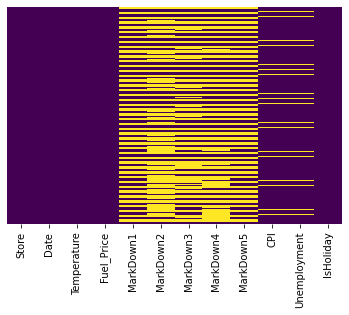

In [7]:

sns.heatmap(features_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### there is missing value in(MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment)

In [8]:
markdown_columns_list = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5","CPI","Unemployment"]
for column_name in markdown_columns_list:
    markdown_frac = features_df[column_name].isnull().sum() / features_df[column_name].shape[0]
    print(f"{int(100 * round(markdown_frac, 2))}% of {column_name} values are NaN.")

51% of MarkDown1 values are NaN.
64% of MarkDown2 values are NaN.
56% of MarkDown3 values are NaN.
57% of MarkDown4 values are NaN.
51% of MarkDown5 values are NaN.
7% of CPI values are NaN.
7% of Unemployment values are NaN.


In [9]:
# Now i will explore other data.
sales_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [10]:
sales_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


<AxesSubplot:>

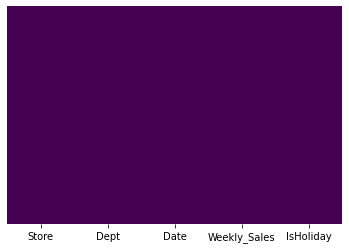

In [12]:
sns.heatmap(sales_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### we didn’t have any missing value. but we wanna convert categorical data so we will use dummy variable

In [13]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [14]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [15]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


<AxesSubplot:>

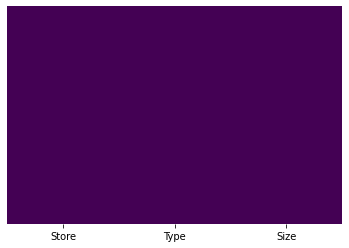

In [16]:
sns.heatmap(stores_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### we didn’t have any missing value. but we wanna convert categorical data so we will use dummy variable

In [17]:
data_merge = pd.merge(features_df, stores_df, on = ['Store'], how='right')
data_merge = pd.merge(data_merge, sales_df, on = ['Date','Store','IsHoliday'], how='right')


In [18]:
data_merge

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,1,46039.49
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,1,41595.55
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,1,19403.54
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,1,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221,98,508.37
421566,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221,98,628.10
421567,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221,98,1061.02
421568,45,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221,98,760.01


In [19]:
data_merge['Date'].dtypes

dtype('O')

In [20]:
data_merge['Date'] = pd.to_datetime(data_merge['Date'])


c:\Users\Soft Key\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Soft Key\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Soft Key\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Soft Key\AppData\Local\Programs\Python\Python310\lib

In [21]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

<AxesSubplot:>

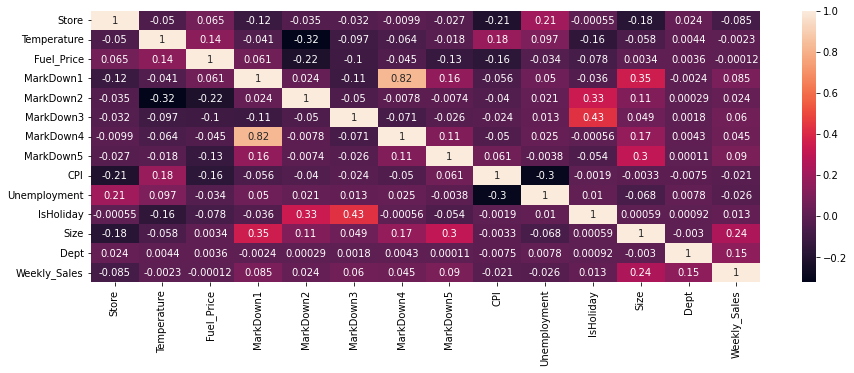

In [22]:
plt.figure(1, figsize=(15,5))
sns.heatmap(data_merge.corr(), annot=True)

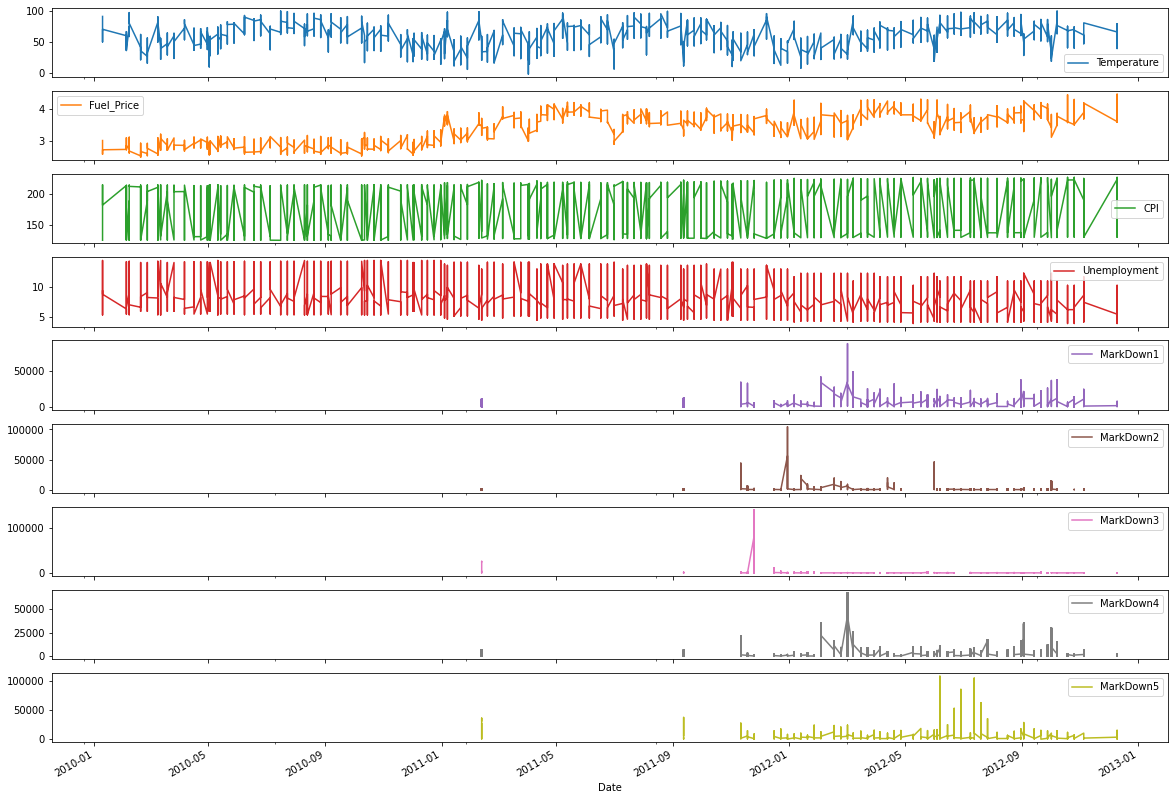

In [23]:
data_merge[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

In [24]:
data_merge['Date'].max()

Timestamp('2012-12-10 00:00:00')

In [25]:
data_merge['Date'].min()

Timestamp('2010-01-10 00:00:00')

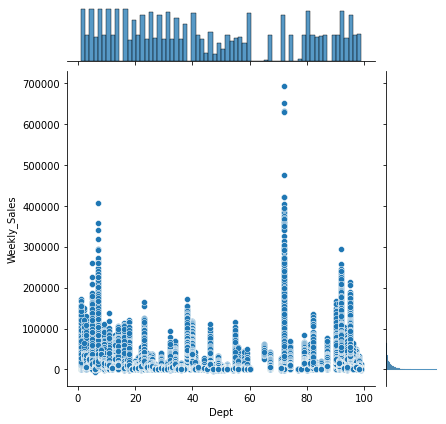

In [26]:
sns.jointplot(x='Dept',y='Weekly_Sales',data=data_merge)

Text(0, 0.5, 'Weekly Sales ')

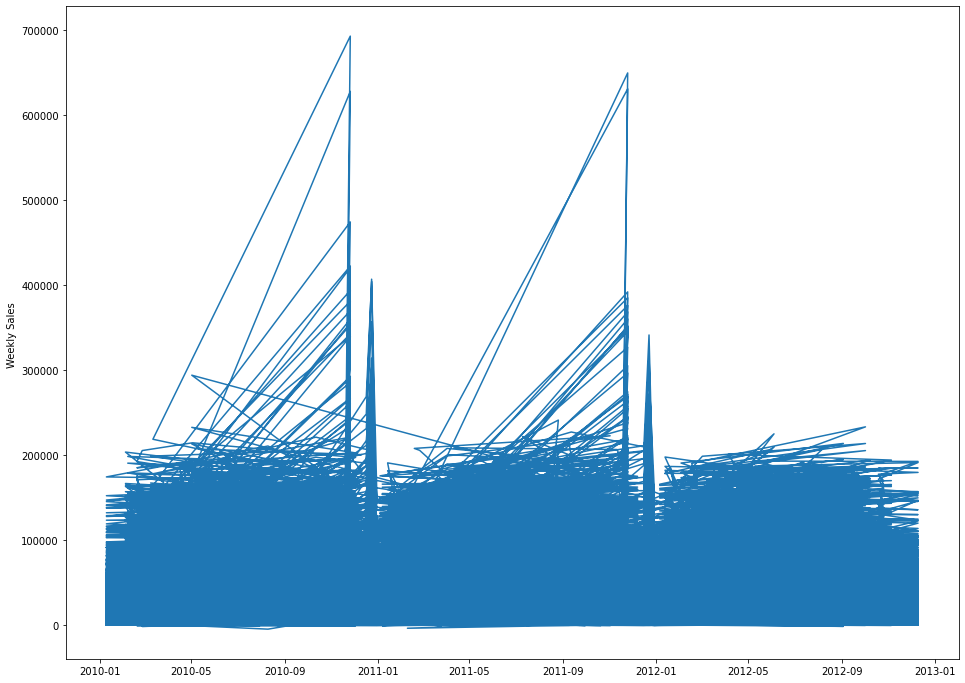

In [44]:
fig = plt.figure(figsize = (16, 12))
plt.plot(data_merge["Date"], data_merge["Weekly_Sales"])
plt.ylabel("Weekly Sales ")

*** As i showed the prvious photo i deside to sum all sales in month and plot data.***

*** show the next plot.***

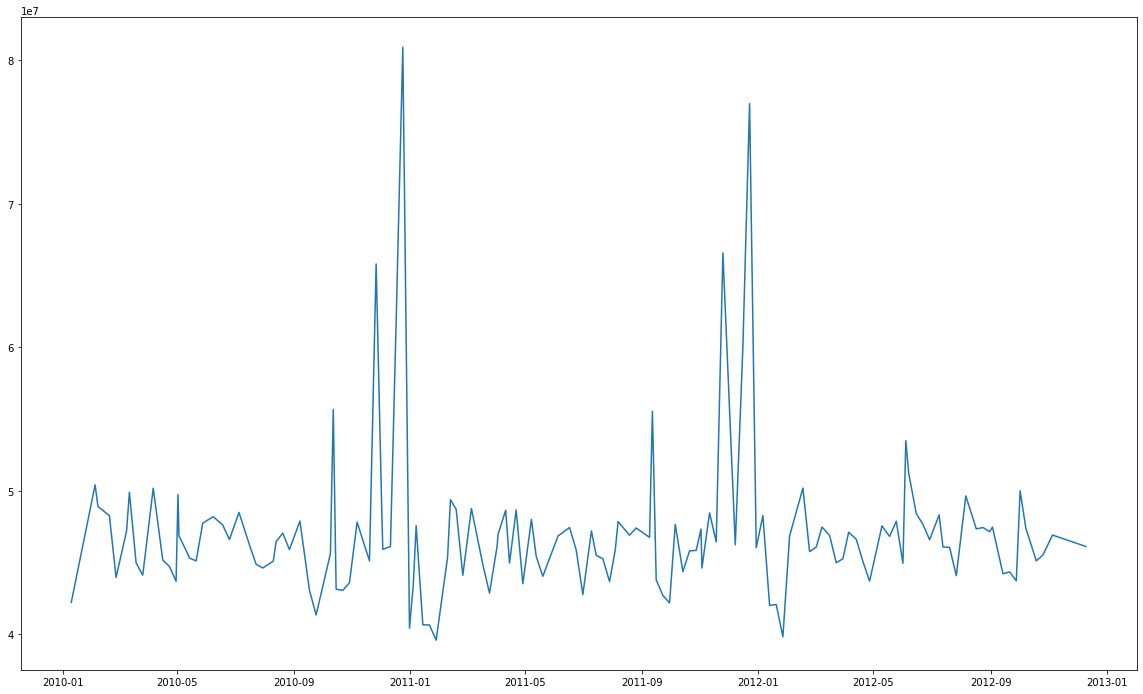

In [27]:
df_temp = data_merge.groupby('Date').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
ax.plot('Date', 'Weekly_Sales', data=df_temp)

(array([ 2.,  0.,  3.,  0.,  1.,  1.,  3.,  3.,  3.,  6.,  7.,  3.,  6.,
        14.,  6., 13.,  6., 10., 12., 10.,  5.,  8.,  3.,  1.,  3.,  3.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([39599852.99      , 40013168.6161    , 40426484.2422    ,
        40839799.8683    , 41253115.4944    , 41666431.1205    ,
        42079746.7466    , 42493062.3727    , 42906377.9988    ,
        43319693.6249    , 43733009.251     , 44146324.8771    ,
        44559640.5032    , 44972956.1293    , 45386271.7554    ,
        45799587.3815    , 46212903.0076    , 46626218.6337    ,
        47039534.2598    , 47452849.8859    

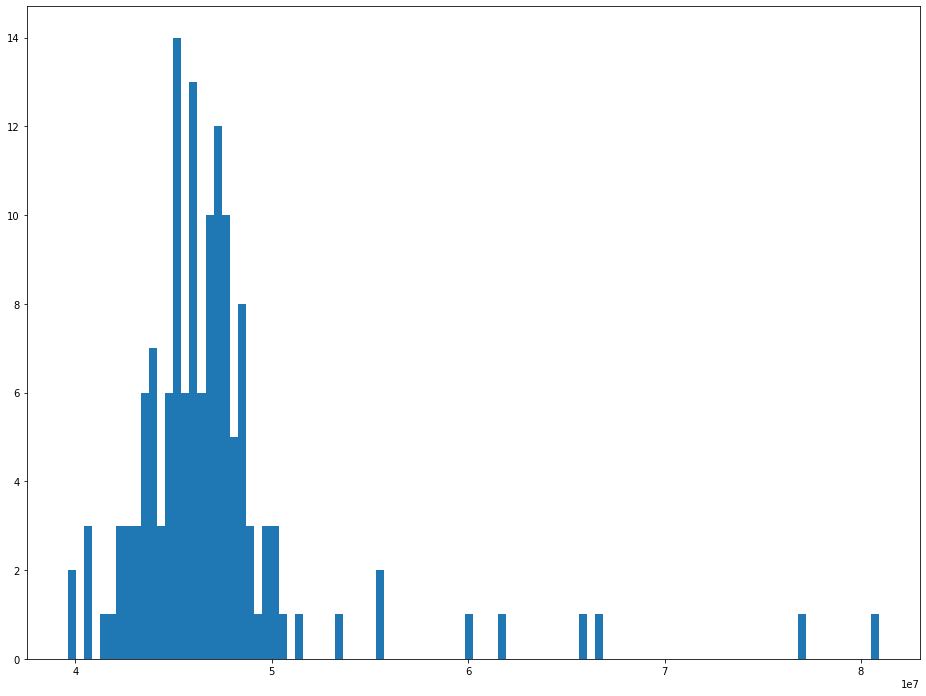

In [35]:
plt.figure(figsize = (16, 12))
plt.hist(df_temp['Weekly_Sales'],bins=100)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

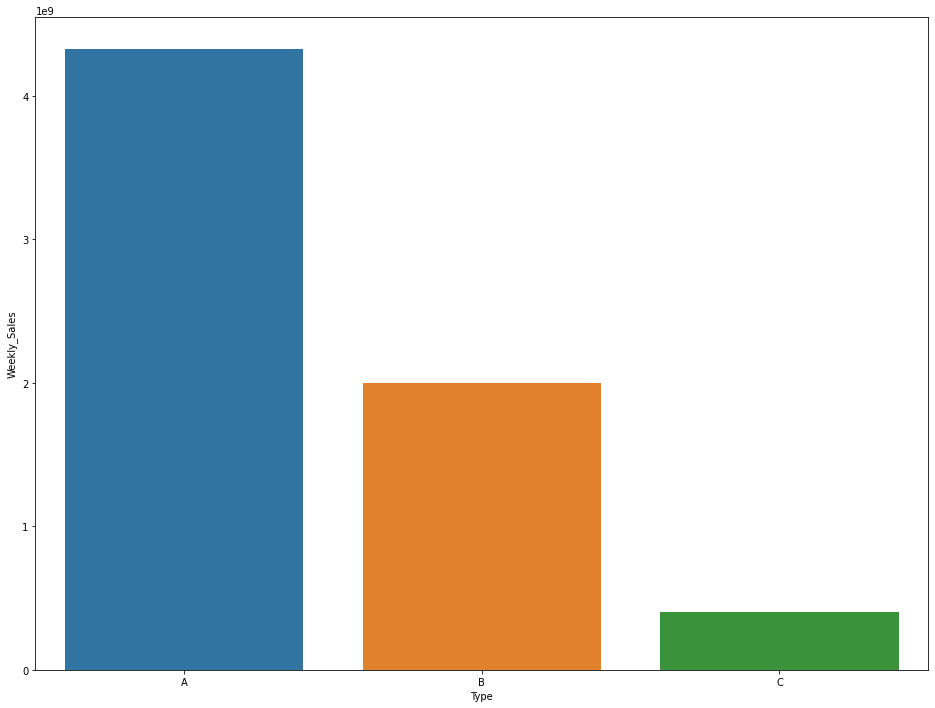

In [43]:
df= data_merge.groupby('Type').sum()['Weekly_Sales'].reset_index()
plt.figure(figsize = (16, 12))
sns.barplot(x=df['Type'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

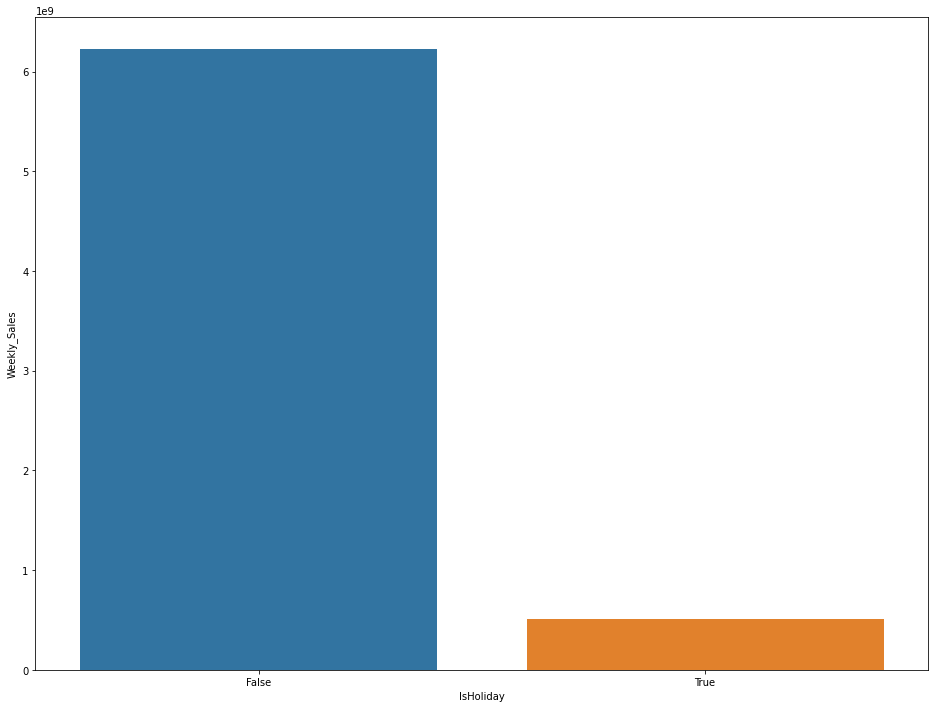

In [46]:
df= data_merge.groupby('IsHoliday').sum()['Weekly_Sales'].reset_index()
plt.figure(figsize = (16, 12))
sns.barplot(x=df['IsHoliday'],y=df['Weekly_Sales'])

*** we showed that most of people not sales in holidays week.

### Great job!